In [1]:
import numpy as np
import os
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [62]:
ambatale_wl_fcst_file = '/home/hasitha/Desktop/WaterLevel/ambatale_wl_fcst.csv'
ambatale_wl_obs_file = '/home/hasitha/Desktop/WaterLevel/ambatale_wl_obs.csv'

ingurukade_wl_fcst_file = '/home/hasitha/Desktop/WaterLevel/ingurukade_wl_fcst.csv'
ingurukade_wl_obs_file = '/home/hasitha/Desktop/WaterLevel/ingurukade_wl_obs.csv'

janakala_wl_fcst_file = '/home/hasitha/Desktop/WaterLevel/janakala_wl_fcst.csv'
janakala_wl_obs_file = '/home/hasitha/Desktop/WaterLevel/janakala_wl_obs.csv'

kaduwela_wl_fcst_file = '/home/hasitha/Desktop/WaterLevel/kaduwela_wl_fcst.csv'
kaduwela_wl_obs_file = '/home/hasitha/Desktop/WaterLevel/kaduwela_wl_obs.csv'

nagalagam_wl_fcst_file = '/home/hasitha/Desktop/WaterLevel/nagalagam_wl_fcst.csv'
nagalagam_wl_obs_file = '/home/hasitha/Desktop/WaterLevel/nagalagam_wl_obs.csv'

mattakkuliya_wl_fcst_file = '/home/hasitha/Desktop/WaterLevel/mattakkuliya_wl_fcst.csv'
mattakkuliya_wl_obs_file = '/home/hasitha/Desktop/WaterLevel/mattakkuliya_wl_obs.csv'

wellawatta_wl_fcst_file = '/home/hasitha/Desktop/WaterLevel/wellawatta_wl_fcst.csv'
wellawatta_wl_obs_file = '/home/hasitha/Desktop/WaterLevel/wellawatta_wl_obs.csv'

yakbedda_wl_fcst_file = '/home/hasitha/Desktop/WaterLevel/yakbedda_wl_fcst.csv'
yakbedda_wl_obs_file = '/home/hasitha/Desktop/WaterLevel/yakbedda_wl_obs.csv'

In [51]:
def get_df_val(df, time):
    filtered_df = df[(df['time']==time.strftime('%Y-%m-%d %H:%M:%S'))]
    if not filtered_df.empty:
        wl = filtered_df.iloc[0]['value']
        return wl
    else:
        return None

In [52]:
def get_wl_df(data_file,ts_start,ts_end,step,station):
    data_df = pd.read_csv(data_file)
    time_series = []
    start_time = datetime.strptime(ts_start, '%Y-%m-%d %H:%M:%S')
    end_time = datetime.strptime(ts_end, '%Y-%m-%d %H:%M:%S')
    time_step = start_time
    while (time_step<= end_time):
        if get_df_val(data_df, time_step):
            value = float(get_df_val(data_df, time_step))
        else:
            value = None
        time_series.append([time_step, value])
        time_step = time_step + timedelta(minutes=step)
    formatted_df = pd.DataFrame(time_series, columns=['time',station])
    return formatted_df

In [54]:
ambatale_wl_fcst_df = get_wl_df(ambatale_wl_fcst_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'forecast')
ambatale_wl_obs_df = get_wl_df(ambatale_wl_obs_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'observed')

Text(0,0.5,'Water Level (m)')

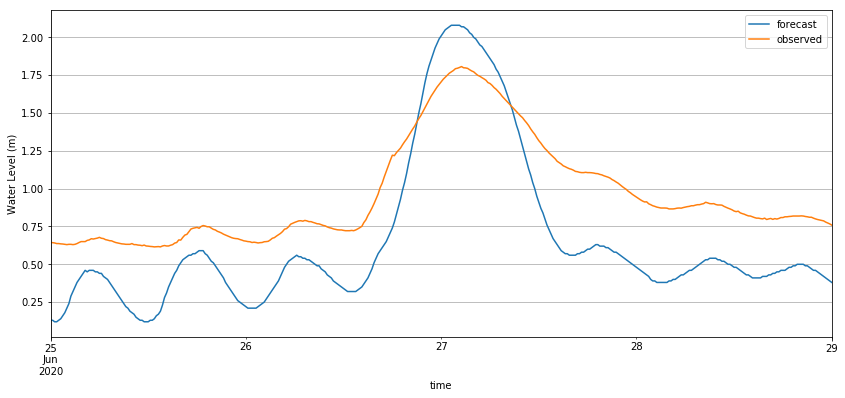

In [55]:
ambatale_plot_df = reduce(lambda x,y: pd.merge(x,y, on='time', how='outer'), [ambatale_wl_fcst_df, ambatale_wl_obs_df.interpolate(method ='linear')])
ambatale_plot_df.plot(x='time', y=['forecast','observed'], kind='line', figsize=(14,6), grid=True).set_ylabel('Water Level (m)')

In [23]:
fcst_df = pd.read_csv(ambatale_wl_fcst_file)
fcst_df

,time,value
0,2020-06-25 00:00:00,0.13
1,2020-06-25 00:15:00,0.13
2,2020-06-25 00:30:00,0.12
3,2020-06-25 00:45:00,0.12
4,2020-06-25 01:00:00,0.13
...,...,...
380,2020-06-28 23:00:00,0.42
381,2020-06-28 23:15:00,0.41
382,2020-06-28 23:30:00,0.40
383,2020-06-28 23:45:00,0.39


In [24]:
obs_df = pd.read_csv(ambatale_wl_obs_file)
obs_df

,time,value
0,2020-06-25 00:00:00,0.644
1,2020-06-25 00:05:00,0.644
2,2020-06-25 00:10:00,0.643
3,2020-06-25 00:15:00,0.643
4,2020-06-25 00:20:00,0.641
...,...,...
1092,2020-06-28 23:40:00,0.770
1093,2020-06-28 23:45:00,0.767
1094,2020-06-28 23:50:00,0.765
1095,2020-06-28 23:55:00,0.762


Text(0,0.5,'Water Level (m)')

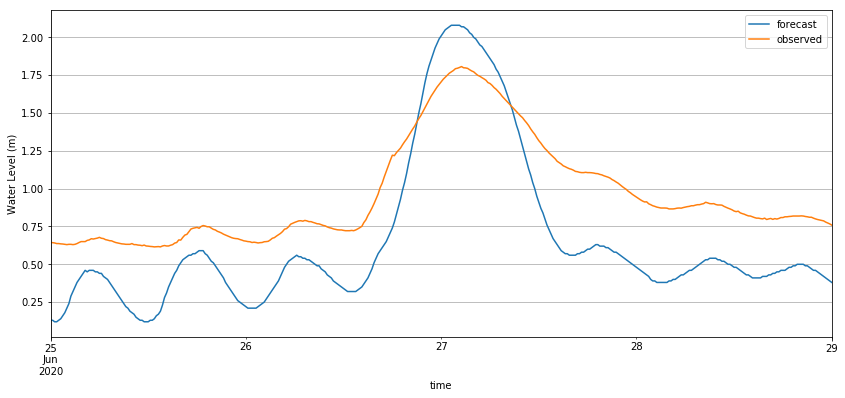

In [56]:
ambatale_wl_fcst_df = get_wl_df(ambatale_wl_fcst_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'forecast')
ambatale_wl_obs_df = get_wl_df(ambatale_wl_obs_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'observed')
ambatale_plot_df = reduce(lambda x,y: pd.merge(x,y, on='time', how='outer'), [ambatale_wl_fcst_df, ambatale_wl_obs_df.interpolate(method ='linear')])
ambatale_plot_df.plot(x='time', y=['forecast','observed'], kind='line', figsize=(14,6), grid=True).set_ylabel('Water Level (m)')

Text(0,0.5,'Water Level (m)')

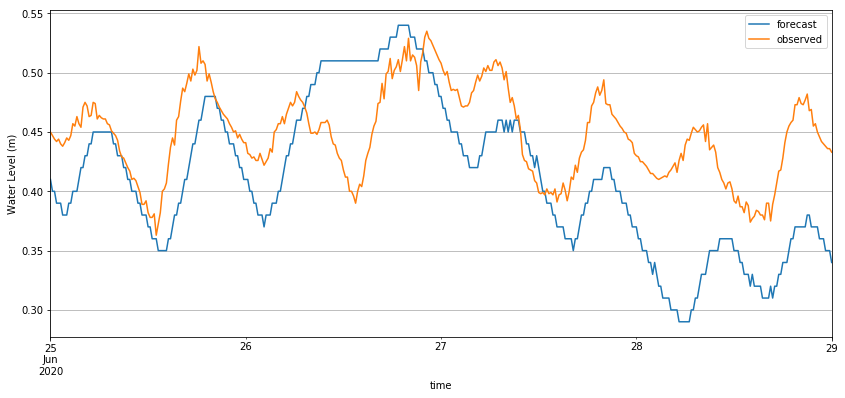

In [57]:
ingurukade_wl_fcst_df = get_wl_df(ingurukade_wl_fcst_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'forecast')
ingurukade_wl_obs_df = get_wl_df(ingurukade_wl_obs_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'observed')
ingurukade_plot_df = reduce(lambda x,y: pd.merge(x,y, on='time', how='outer'), [ingurukade_wl_fcst_df, ingurukade_wl_obs_df.interpolate(method ='linear')])
ingurukade_plot_df.plot(x='time', y=['forecast','observed'], kind='line', figsize=(14,6), grid=True).set_ylabel('Water Level (m)')

Text(0,0.5,'Water Level (m)')

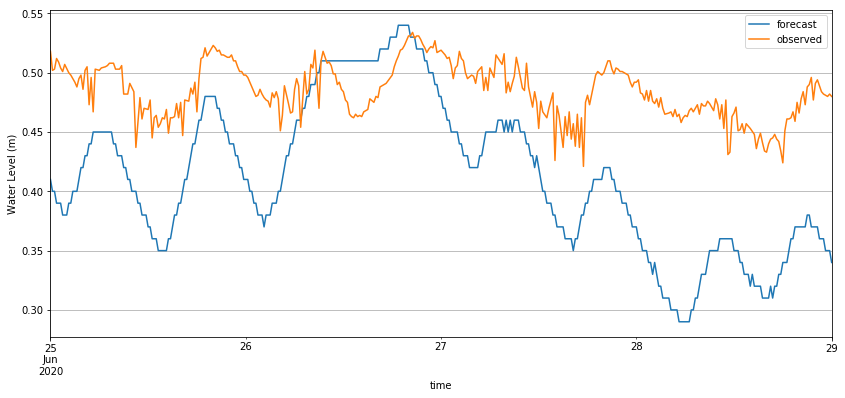

In [117]:
janakala_wl_fcst_df = get_wl_df(janakala_wl_fcst_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'forecast')
janakala_wl_obs_df = get_wl_df(janakala_wl_obs_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'observed')
janakala_plot_df = reduce(lambda x,y: pd.merge(x,y, on='time', how='outer'), [janakala_wl_fcst_df, janakala_wl_obs_df.interpolate(method ='linear')])
janakala_plot_df.plot(x='time', y=['forecast','observed'], kind='line', figsize=(14,6), grid=True).set_ylabel('Water Level (m)')

Text(0,0.5,'Water Level (m)')

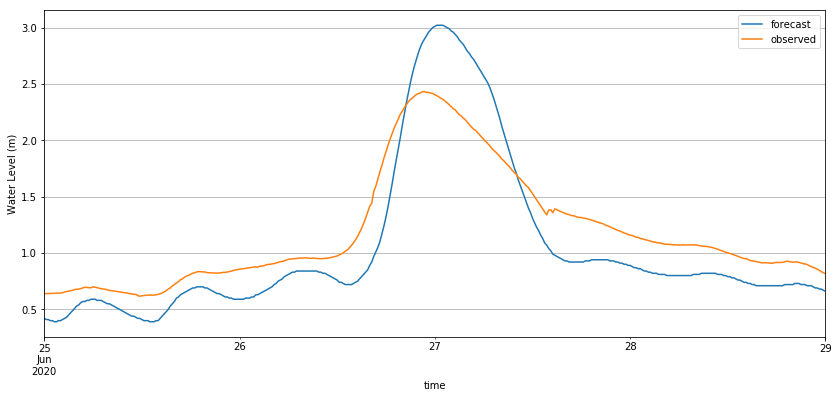

In [114]:
kaduwela_wl_fcst_df = get_wl_df(kaduwela_wl_fcst_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'forecast')
kaduwela_wl_obs_df = get_wl_df(kaduwela_wl_obs_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'observed')
kaduwela_plot_df = reduce(lambda x,y: pd.merge(x,y, on='time', how='outer'), [kaduwela_wl_fcst_df, kaduwela_wl_obs_df.interpolate(method ='linear')])
kaduwela_plot_df.plot(x='time', y=['forecast','observed'], kind='line', figsize=(14,6), grid=True).set_ylabel('Water Level (m)')

Text(0,0.5,'Water Level (m)')

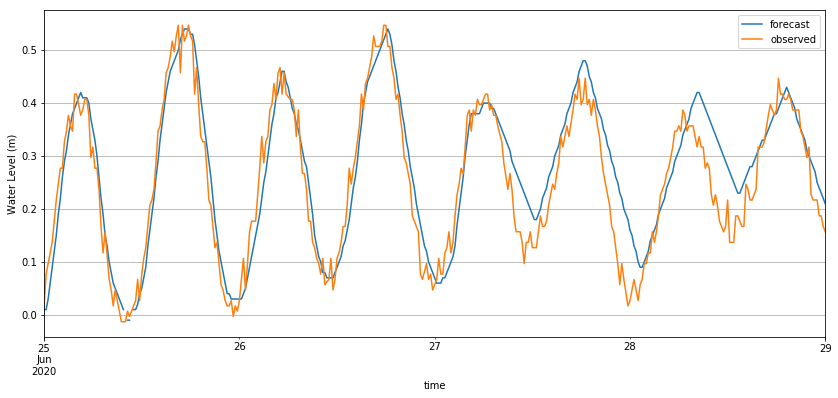

In [60]:
mattakkuliya_wl_fcst_df = get_wl_df(mattakkuliya_wl_fcst_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'forecast')
mattakkuliya_wl_obs_df = get_wl_df(mattakkuliya_wl_obs_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'observed')
mattakkuliya_plot_df = reduce(lambda x,y: pd.merge(x,y, on='time', how='outer'), [mattakkuliya_wl_fcst_df, mattakkuliya_wl_obs_df.interpolate(method ='linear')])
mattakkuliya_plot_df.plot(x='time', y=['forecast','observed'], kind='line', figsize=(14,6), grid=True).set_ylabel('Water Level (m)')

Text(0,0.5,'Water Level (m)')

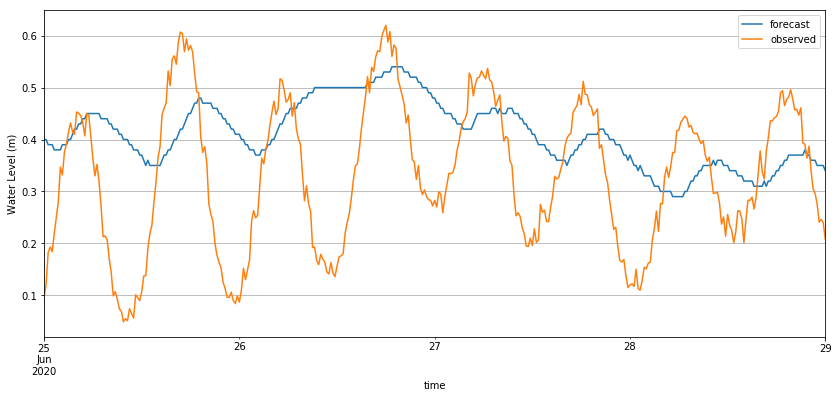

In [119]:
nagalagam_wl_fcst_df = get_wl_df(nagalagam_wl_fcst_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'forecast')
nagalagam_wl_obs_df = get_wl_df(nagalagam_wl_obs_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'observed')
nagalagam_plot_df = reduce(lambda x,y: pd.merge(x,y, on='time', how='outer'), [nagalagam_wl_fcst_df, nagalagam_wl_obs_df.interpolate(method ='linear')])
nagalagam_plot_df.plot(x='time', y=['forecast','observed'], kind='line', figsize=(14,6), grid=True).set_ylabel('Water Level (m)')

Text(0,0.5,'Water Level (m)')

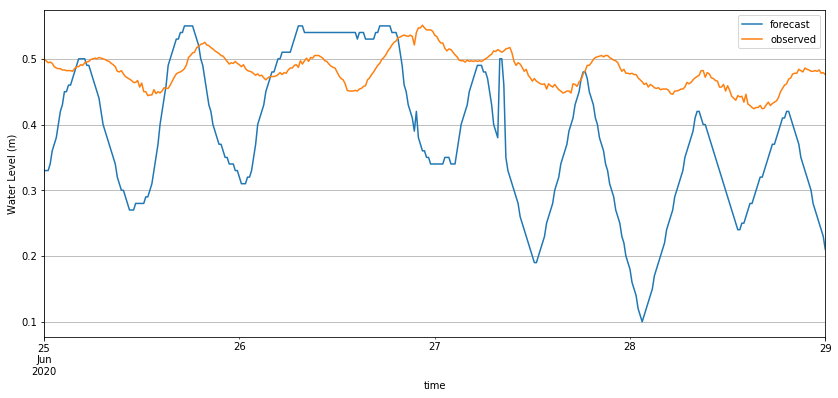

In [64]:
wellawatta_wl_fcst_df = get_wl_df(wellawatta_wl_fcst_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'forecast')
wellawatta_wl_obs_df = get_wl_df(wellawatta_wl_obs_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'observed')
wellawatta_plot_df = reduce(lambda x,y: pd.merge(x,y, on='time', how='outer'), [wellawatta_wl_fcst_df, wellawatta_wl_obs_df.interpolate(method ='linear')])
wellawatta_plot_df.plot(x='time', y=['forecast','observed'], kind='line', figsize=(14,6), grid=True).set_ylabel('Water Level (m)')

Text(0,0.5,'Water Level (m)')

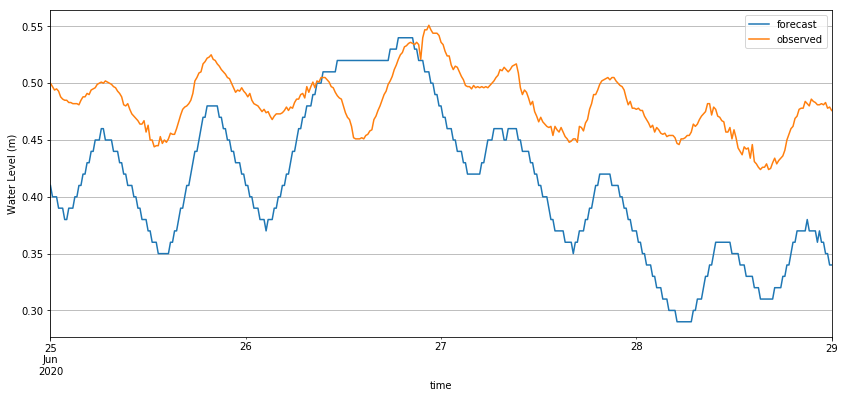

In [66]:
yakbedda_wl_fcst_df = get_wl_df(yakbedda_wl_fcst_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'forecast')
yakbedda_wl_obs_df = get_wl_df(yakbedda_wl_obs_file, '2020-06-25 00:00:00', '2020-06-29 00:00:00', 15, 'observed')
yakbedda_plot_df = reduce(lambda x,y: pd.merge(x,y, on='time', how='outer'), [yakbedda_wl_fcst_df, yakbedda_wl_obs_df.interpolate(method ='linear')])
yakbedda_plot_df.plot(x='time', y=['forecast','observed'], kind='line', figsize=(14,6), grid=True).set_ylabel('Water Level (m)')

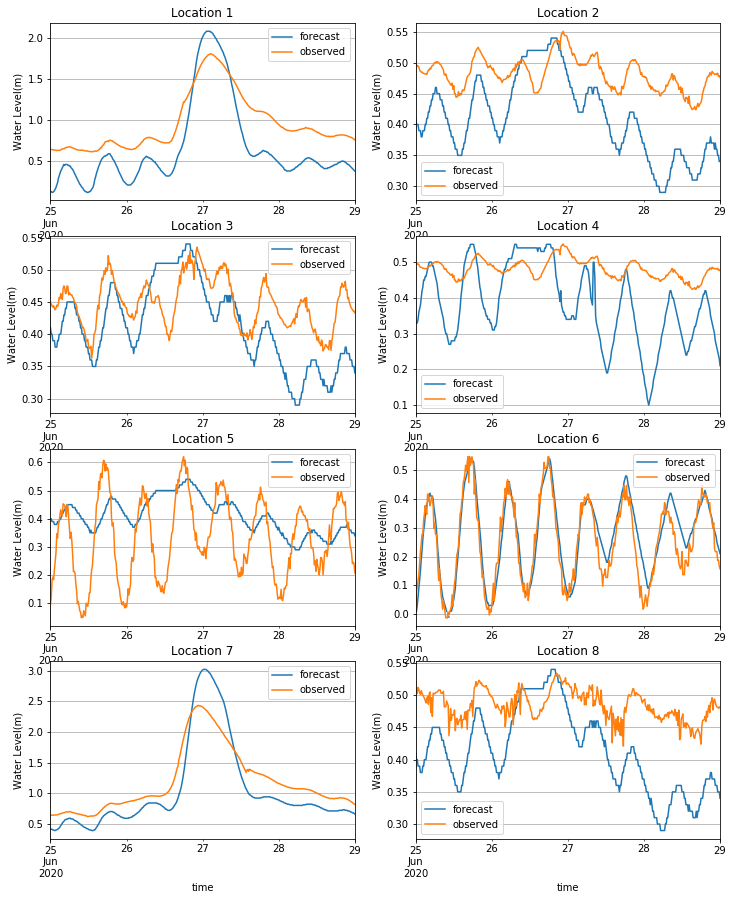

In [122]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 15))
ambatale_plot_df.plot(ax=axes[0,0],x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 1').set_ylabel('Water Level(m)')
yakbedda_plot_df.plot(ax=axes[0,1], x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 2').set_ylabel('Water Level(m)')
ingurukade_plot_df.plot(ax=axes[1,0], x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 3').set_ylabel('Water Level(m)')
wellawatta_plot_df.plot(ax=axes[1,1], x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 4').set_ylabel('Water Level(m)')
nagalagam_plot_df.plot(ax=axes[2,0], x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 5').set_ylabel('Water Level(m)')
mattakkuliya_plot_df.plot(ax=axes[2,1], x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 6').set_ylabel('Water Level(m)')
kaduwela_plot_df.plot(ax=axes[3,0], x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 7').set_ylabel('Water Level(m)')
janakala_plot_df.plot(ax=axes[3,1], x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 8').set_ylabel('Water Level(m)')
fig.savefig("/home/hasitha/Desktop/Thesis/Images/chapter4/flo2d_comp_all.png")

Text(0,0.5,'Water Level(m)')

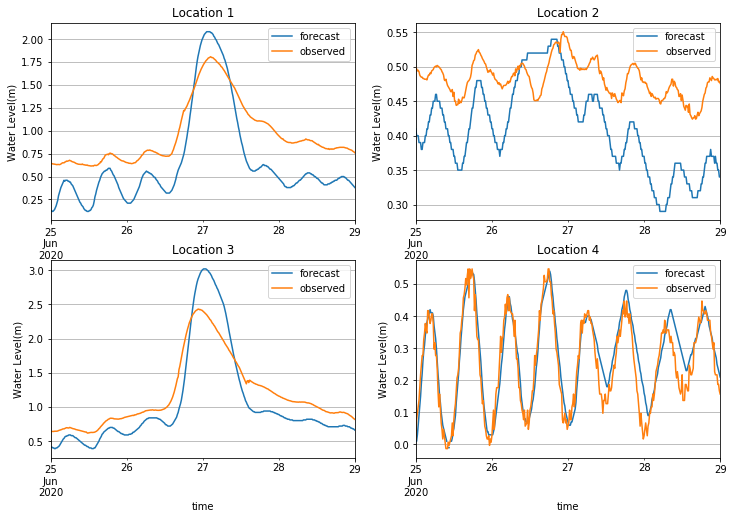

In [121]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
ambatale_plot_df.plot(ax=axes[0,0],x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 1').set_ylabel('Water Level(m)')
yakbedda_plot_df.plot(ax=axes[0,1], x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 2').set_ylabel('Water Level(m)')
kaduwela_plot_df.plot(ax=axes[1,0], x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 3').set_ylabel('Water Level(m)')
mattakkuliya_plot_df.plot(ax=axes[1,1], x='time', y=['forecast','observed'], kind='line', grid=True, title='Location 4').set_ylabel('Water Level(m)')